In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import json

In [2]:
path_reports = "../reports/"

In [3]:
columns = ["Model name", "Accuracy", "Data noise"]
data = list()
pathlist = Path(path_reports).glob('**/accuracies.json')
for path in pathlist:
     if 'Feedback_4block_to_1block_10_epochs' not in str(path):
        path_in_str = str(path)
        model_name = '-'.join(path_in_str.split('/')[2:-1])
        #print(path_in_str.split('/'))
        print(model_name)
        with open(path_in_str) as json_file:
            accuracies = json.load(json_file)
            for acc, noise in zip([accuracies['test_acc_original_data'],
                                accuracies['test_acc_gaussian_noise'],
                                accuracies['test_acc_salt_pepper_noise']],
                               ["without_noise", "gaussian_noise", "salt_pepper_noise"]):
                data.append([model_name, round(acc,2), noise])

frozenVGG16-Feedback_5block_to_3block
frozenVGG16-Feedback_4block_to_4block
frozenVGG16-Feedback_4block_to_1block
frozenVGG16-Feedback_5block_to_4block
frozenVGG16-Feedback_5block_to_5block
notFrozenVGG16-VGG16Feedback 4Block To 1Block
notFrozenVGG16-VGG16Forward
frozenVGG16TrainGaussianNoise-Feedback_5block_to_3block
frozenVGG16TrainGaussianNoise-Feedback_4block_to_4block
notFrozenVGG16TrainGaussianNoise-VGG16Forward


In [4]:
training_res = pd.DataFrame(data, columns=columns).sort_values(by='Model name', ascending=True)

In [5]:
def plot_accuracies(df, title='Test accuracies'):
    sns.set(rc={#'axes.facecolor':'white',
                #'figure.facecolor':'white',
                "grid.color": "grey",
                "grid.linestyle": ":",
                "figure.figsize":(10,6),
                "axes.labelsize":15,
                "axes.titlesize":20})
    fig, ax = plt.subplots()
    sns.scatterplot(data=df, s=100, x="Accuracy", y="Model name", hue="Data noise")\
        .set(title=title)

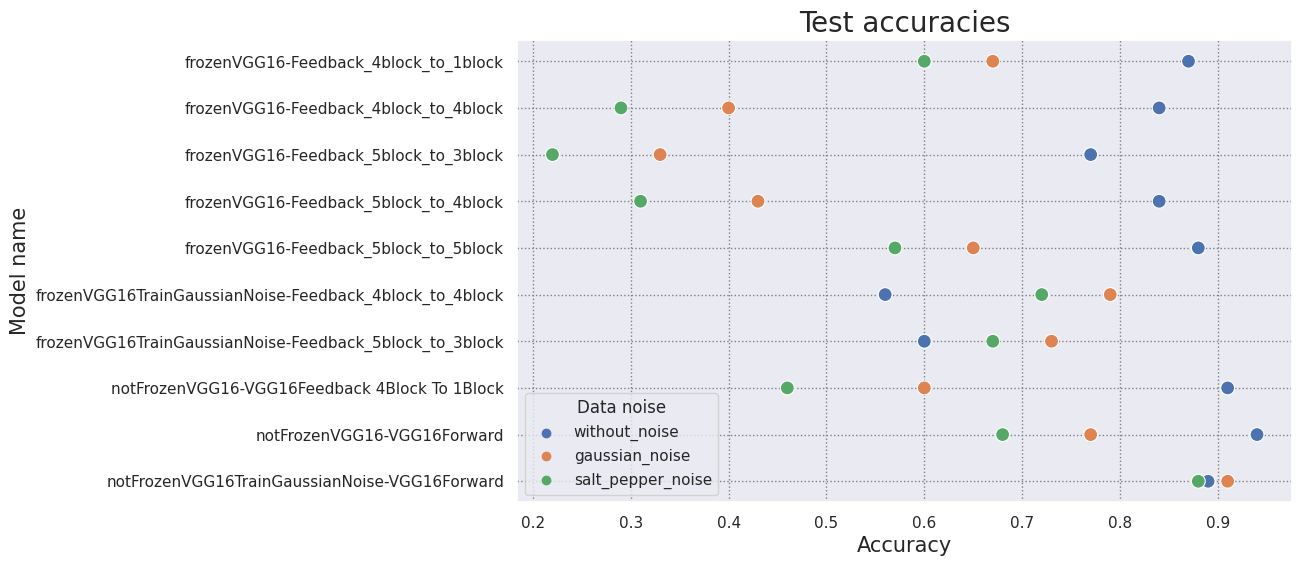

In [6]:
plot_accuracies(training_res)

In [7]:
not_frozen_ds = training_res.loc[training_res['Model name'].str.contains('not')]

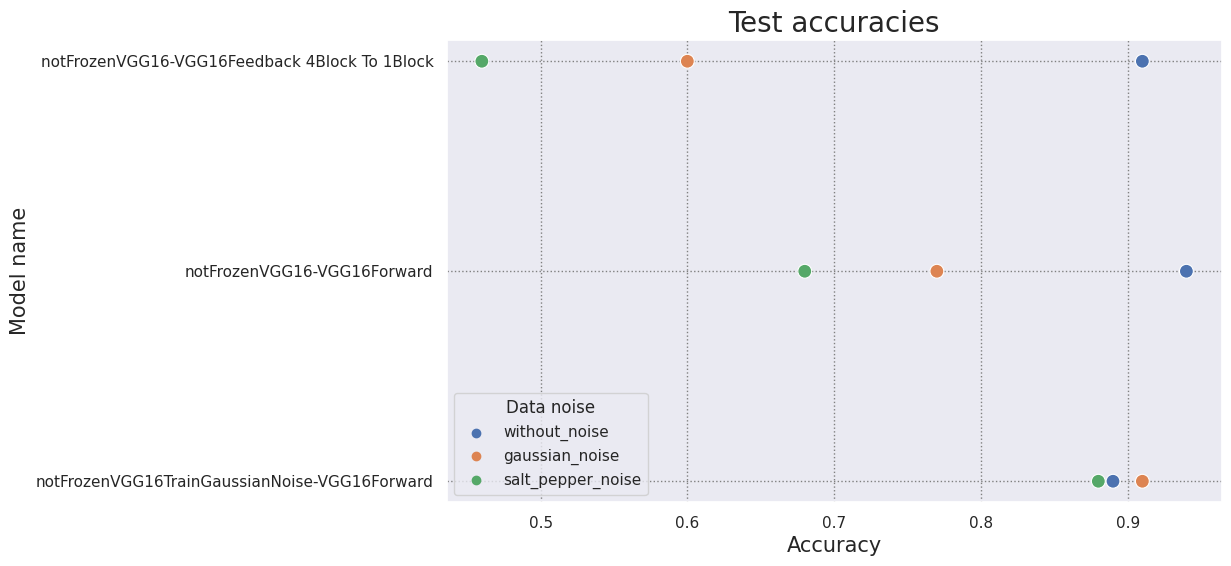

In [8]:
plot_accuracies(not_frozen_ds)

In [9]:
frozen_ds = training_res.loc[~training_res['Model name'].str.contains('not')]

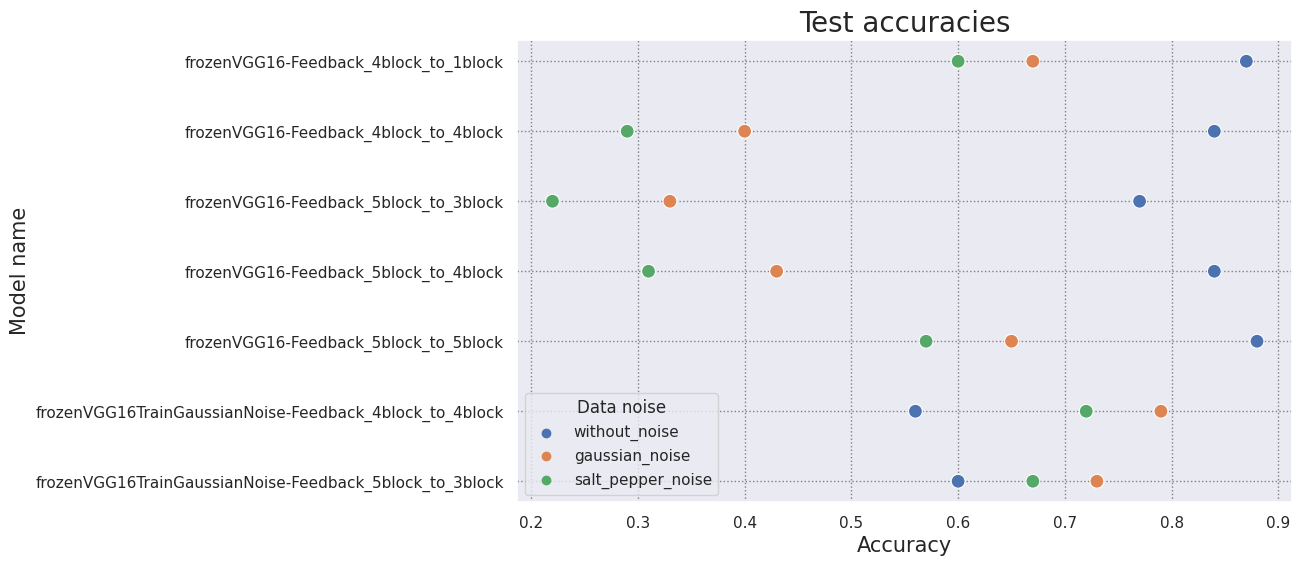

In [10]:
plot_accuracies(frozen_ds)

In [11]:
gaussian = training_res.loc[training_res['Model name'].str.contains('Gaussian')]

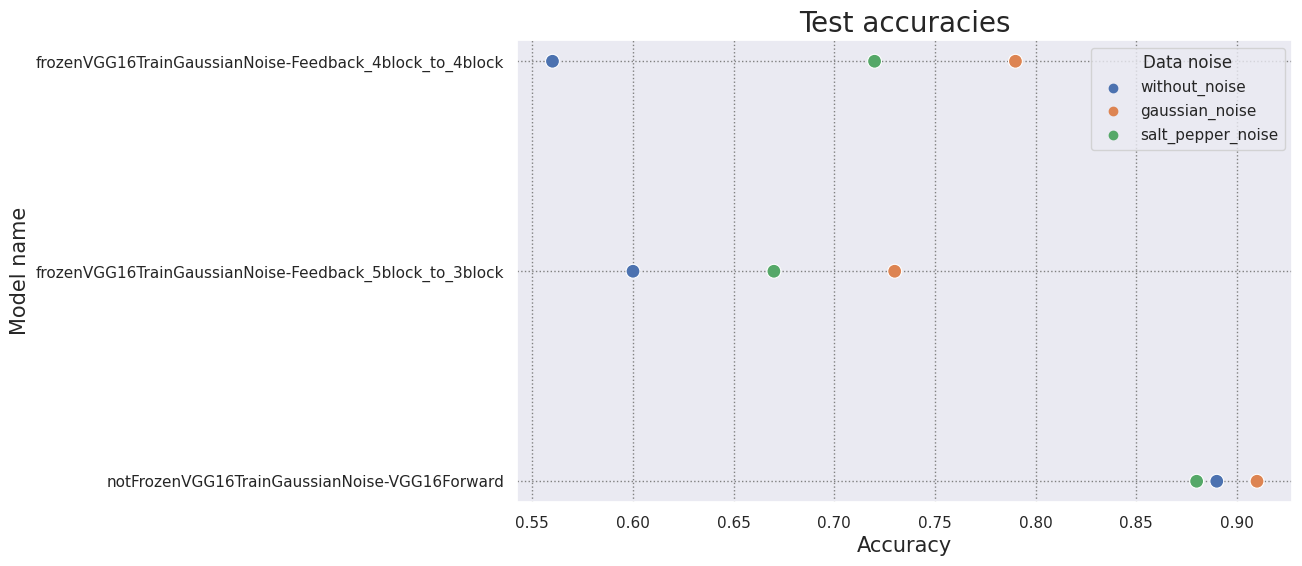

In [12]:
plot_accuracies(gaussian)